# ExtraaLearn Project

## Context

The EdTech industry has been surging in the past decade immensely, and according to a forecast, the Online Education market would be worth $286.62bn by 2023 with a compound annual growth rate (CAGR) of 10.26% from 2018 to 2023. The modern era of online education has enforced a lot in its growth and expansion beyond any limit. Due to having many dominant features like ease of information sharing, personalized learning experience, transparency of assessment, etc, it is now preferable to traditional education.

In the present scenario due to the Covid-19, the online education sector has witnessed rapid growth and is attracting a lot of new customers. Due to this rapid growth, many new companies have emerged in this industry. With the availability and ease of use of digital marketing resources, companies can reach out to a wider audience with their offerings. The customers who show interest in these offerings are termed as leads. There are various sources of obtaining leads for Edtech companies, like

* The customer interacts with the marketing front on social media or other online platforms
* The customer browses the website/app and downloads the brochure
* The customer connects through emails for more information

The company then nurtures these leads and tries to convert them to paid customers. For this, the representative from the organization connects with the lead on call or through email to share further details.

## Objective

ExtraaLearn is an initial stage startup that offers programs on cutting-edge technologies to students and professionals to help them upskill/reskill. With a large number of leads being generated regularly, one of the issues faced by ExtraaLearn is to identify which of the leads are more likely to convert so that they can allocate resources accordingly. You, as a data scientist at ExtraaLearn, have been provided the leads data to:
* Analyze and build an ML model to help identify which leads are more likely to convert to paid customers,
* Find the factors driving the lead conversion process
* Create a profile of the leads which are likely to convert


## Data Description

The data contains the different attributes of leads and their interaction details with ExtraaLearn. The detailed data dictionary is given below.


**Data Dictionary**
* ID: ID of the lead
* age: Age of the lead
* current_occupation: Current occupation of the lead. Values include 'Professional','Unemployed',and 'Student'
* first_interaction: How did the lead first interact with ExtraaLearn. Values include 'Website', 'Mobile App'
* profile_completed: What percentage of the profile has been filled by the lead on the website/mobile app. Values include Low - (0-50%), Medium - (50-75%), High (75-100%)
* website_visits: How many times has a lead visited the website
* time_spent_on_website: Total time spent on the website
* page_views_per_visit: Average number of pages on the website viewed during the visits.
* last_activity: Last interaction between the lead and ExtraaLearn.
    * Email Activity: Seeking for details about the program through email, Representative shared information with a lead like a brochure of program, etc
    * Phone Activity: Had a Phone Conversation with a representative, Had conversation over SMS with a representative, etc
    * Website Activity: Interacted on live chat with a representative, Updated profile on the website, etc

* print_media_type1: Flag indicating whether the lead had seen the ad of ExtraaLearn in the Newspaper.
* print_media_type2: Flag indicating whether the lead had seen the ad of ExtraaLearn in the Magazine.
* digital_media: Flag indicating whether the lead had seen the ad of ExtraaLearn on the digital platforms.
* educational_channels: Flag indicating whether the lead had heard about ExtraaLearn in the education channels like online forums, discussion threads, educational websites, etc.
* referral: Flag indicating whether the lead had heard about ExtraaLearn through reference.
* status: Flag indicating whether the lead was converted to a paid customer or not.

### **Please read the instructions carefully before starting the project.**
This is a commented Jupyter IPython Notebook file in which all the instructions and tasks to be performed are mentioned.
* Blanks '_______' are provided in the notebook that
needs to be filled with an appropriate code to get the correct result. With every '_______' blank, there is a comment that briefly describes what needs to be filled in the blank space.
* Identify the task to be performed correctly, and only then proceed to write the required code.
* Fill the code wherever asked by the commented lines like "# write your code here" or "# complete the code". Running incomplete code may throw error.
* Please run the codes in a sequential manner from the beginning to avoid any unnecessary errors.
* Add the results/observations (wherever mentioned) derived from the analysis in the presentation and submit the same.

In [1]:
# Libraries to help with reading and manipulating data
import pandas as pd
import numpy as np


# libaries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)
# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 200)
# setting the precision of floating numbers to 5 decimal points
pd.set_option("display.float_format", lambda x: "%.5f" % x)

# Library to split data
from sklearn.model_selection import train_test_split

# To build model for prediction
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

# To tune different models
from sklearn.model_selection import GridSearchCV


# To get diferent metric scores
from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
    roc_auc_score,
    ConfusionMatrixDisplay,
    precision_recall_curve,
    roc_curve,
    make_scorer,
)

import warnings
warnings.filterwarnings("ignore")

## Import Dataset

In [2]:
learn = pd.read_csv("ExtraaLearn.csv") ##  Complete the code to read the data

In [3]:
# copying data to another variable to avoid any changes to original data
data = learn.copy()

### View the first and last 5 rows of the dataset

In [4]:
data.head(5) ##  Complete the code to view top 5 rows of the data

,ID,age,current_occupation,first_interaction,profile_completed,website_visits,time_spent_on_website,page_views_per_visit,last_activity,print_media_type1,print_media_type2,digital_media,educational_channels,referral,status
0,EXT001,57,Unemployed,Website,High,7,1639,1.86100,Website Activity,Yes,No,Yes,No,No,1
1,EXT002,56,Professional,Mobile App,Medium,2,83,0.32000,Website Activity,No,No,No,Yes,No,0
2,EXT003,52,Professional,Website,Medium,3,330,0.07400,Website Activity,No,No,Yes,No,No,0
3,EXT004,53,Unemployed,Website,High,4,464,2.05700,Website Activity,No,No,No,No,No,1
4,EXT005,23,Student,Website,High,4,600,16.91400,Email Activity,No,No,No,No,No,0


In [5]:
data.tail(5) ##  Complete the code to view last 5 rows of the data

,ID,age,current_occupation,first_interaction,profile_completed,website_visits,time_spent_on_website,page_views_per_visit,last_activity,print_media_type1,print_media_type2,digital_media,educational_channels,referral,status
4607,EXT4608,35,Unemployed,Mobile App,Medium,15,360,2.17000,Phone Activity,No,No,No,Yes,No,0
4608,EXT4609,55,Professional,Mobile App,Medium,8,2327,5.39300,Email Activity,No,No,No,No,No,0
4609,EXT4610,58,Professional,Website,High,2,212,2.69200,Email Activity,No,No,No,No,No,1
4610,EXT4611,57,Professional,Mobile App,Medium,1,154,3.87900,Website Activity,Yes,No,No,No,No,0
4611,EXT4612,55,Professional,Website,Medium,4,2290,2.07500,Phone Activity,No,No,No,No,No,0


### Understand the shape of the dataset

In [6]:
data.shape ## Complete the code to get the shape of data

(4612, 15)

### Check the data types of the columns for the dataset

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4612 entries, 0 to 4611
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ID                     4612 non-null   object 
 1   age                    4612 non-null   int64  
 2   current_occupation     4612 non-null   object 
 3   first_interaction      4612 non-null   object 
 4   profile_completed      4612 non-null   object 
 5   website_visits         4612 non-null   int64  
 6   time_spent_on_website  4612 non-null   int64  
 7   page_views_per_visit   4612 non-null   float64
 8   last_activity          4612 non-null   object 
 9   print_media_type1      4612 non-null   object 
 10  print_media_type2      4612 non-null   object 
 11  digital_media          4612 non-null   object 
 12  educational_channels   4612 non-null   object 
 13  referral               4612 non-null   object 
 14  status                 4612 non-null   int64  
dtypes: f

In [8]:
# checking for duplicate values
data.duplicated().sum() ## Complete the code to check duplicate entries in the data

0

## Exploratory Data Analysis

**Let's check the statistical summary of the data.**

In [9]:
data.describe().T ##  Complete the code to print the statistical summary of the data

,count,mean,std,min,25%,50%,75%,max
age,4612.00000,46.20121,13.16145,18.00000,36.00000,51.00000,57.00000,63.00000
website_visits,4612.00000,3.56678,2.82913,0.00000,2.00000,3.00000,5.00000,30.00000
time_spent_on_website,4612.00000,724.01127,743.82868,0.00000,148.75000,376.00000,1336.75000,2537.00000
page_views_per_visit,4612.00000,3.02613,1.96812,0.00000,2.07775,2.79200,3.75625,18.43400
status,4612.00000,0.29857,0.45768,0.00000,0.00000,0.00000,1.00000,1.00000


In [10]:
# Making a list of all catrgorical variables
cat_col = list(data.select_dtypes("object").columns)

# Printing number of count of each unique value in each column
for column in cat_col:
    print(data[column].value_counts())
    print("-" * 50)

ID
EXT001     1
EXT2884    1
EXT3080    1
EXT3079    1
EXT3078    1
          ..
EXT1537    1
EXT1536    1
EXT1535    1
EXT1534    1
EXT4612    1
Name: count, Length: 4612, dtype: int64
--------------------------------------------------
current_occupation
Professional    2616
Unemployed      1441
Student          555
Name: count, dtype: int64
--------------------------------------------------
first_interaction
Website       2542
Mobile App    2070
Name: count, dtype: int64
--------------------------------------------------
profile_completed
High      2264
Medium    2241
Low        107
Name: count, dtype: int64
--------------------------------------------------
last_activity
Email Activity      2278
Phone Activity      1234
Website Activity    1100
Name: count, dtype: int64
--------------------------------------------------
print_media_type1
No     4115
Yes     497
Name: count, dtype: int64
--------------------------------------------------
print_media_type2
No     4379
Yes     233
Name

In [11]:
# checking the number of unique values
data["ID"].nunique() # Complete the code to check the number of unique values

4612

In [12]:
data.drop(["ID"], axis=1, inplace=True) # Complete the code to drop "ID" column from data

In [13]:
data.head()

,age,current_occupation,first_interaction,profile_completed,website_visits,time_spent_on_website,page_views_per_visit,last_activity,print_media_type1,print_media_type2,digital_media,educational_channels,referral,status
0,57,Unemployed,Website,High,7,1639,1.86100,Website Activity,Yes,No,Yes,No,No,1
1,56,Professional,Mobile App,Medium,2,83,0.32000,Website Activity,No,No,No,Yes,No,0
2,52,Professional,Website,Medium,3,330,0.07400,Website Activity,No,No,Yes,No,No,0
3,53,Unemployed,Website,High,4,464,2.05700,Website Activity,No,No,No,No,No,1
4,23,Student,Website,High,4,600,16.91400,Email Activity,No,No,No,No,No,0


### Univariate Analysis

In [14]:
# function to plot a boxplot and a histogram along the same scale.


def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to the show density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

### Observations on age

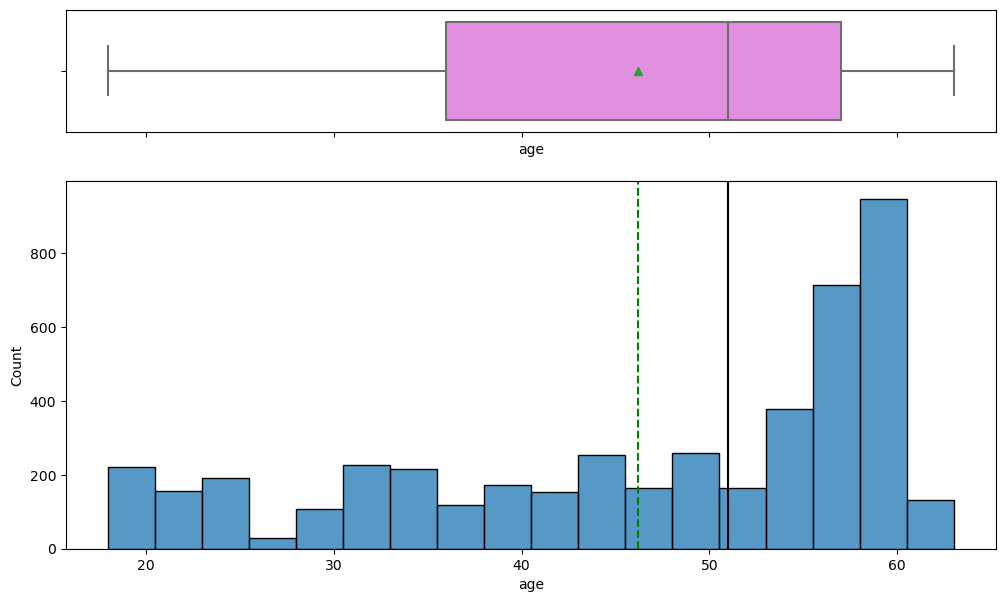

In [15]:
histogram_boxplot(data, "age")

### Observations on website_visits

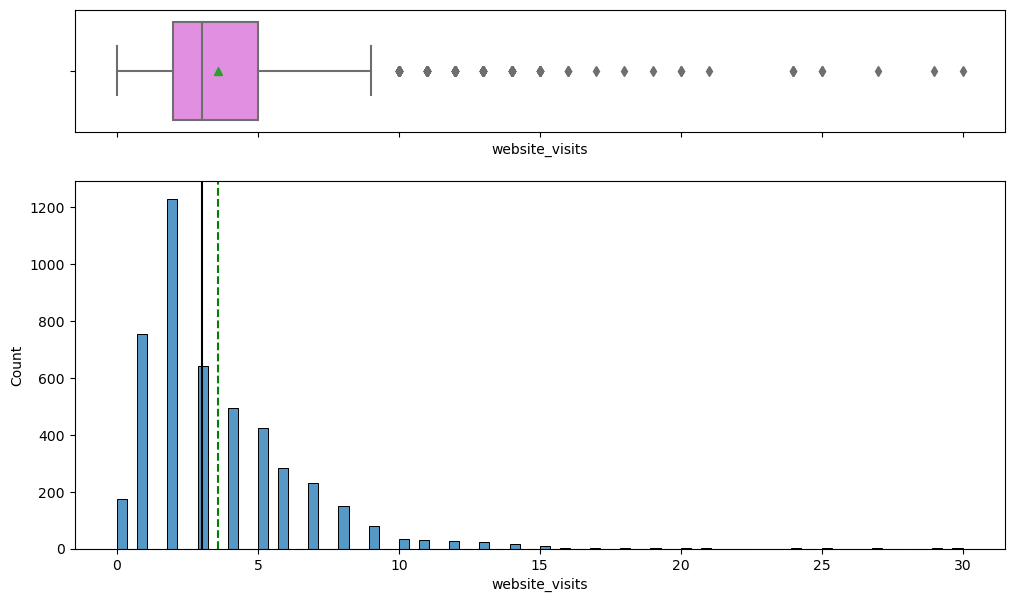

In [16]:
histogram_boxplot(data, "website_visits") # Complete the code to plot a histogram_boxplot for website_visits


In [17]:
# To check how many leads have not visited web-site
data[data["website_visits"] == 0].shape

(174, 14)

### Observations on number of time_spent_on_website

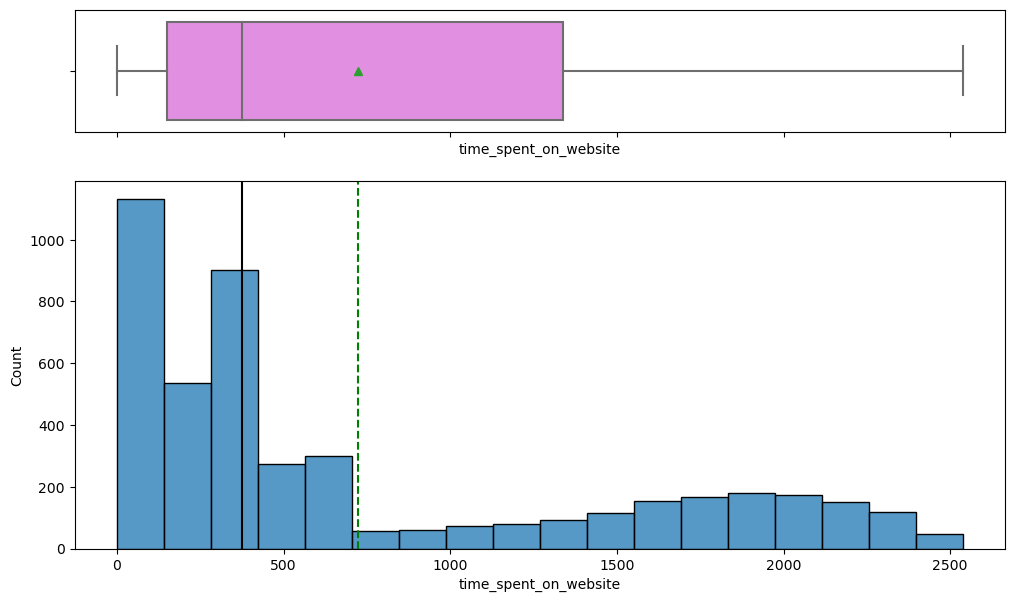

In [18]:
histogram_boxplot(data, "time_spent_on_website") # Complete the code to plot a histogram_boxplot for time_spent_on_website


### Observations on number of page_views_per_visit

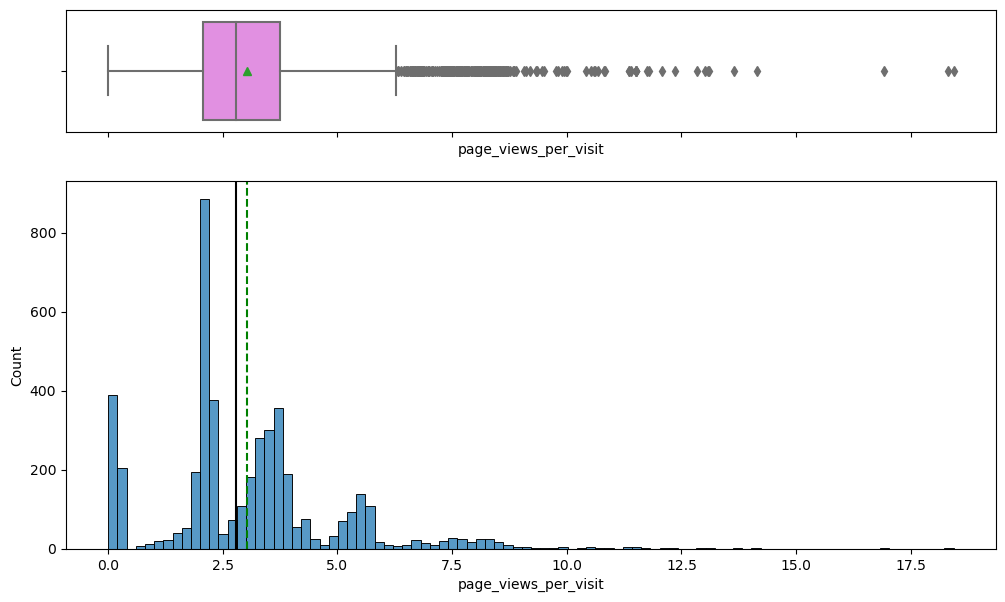

In [19]:
histogram_boxplot(data, "page_views_per_visit") # Complete the code to plot a histogram_boxplot for page_views_per_visit


In [20]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

### Observations on current_occupation

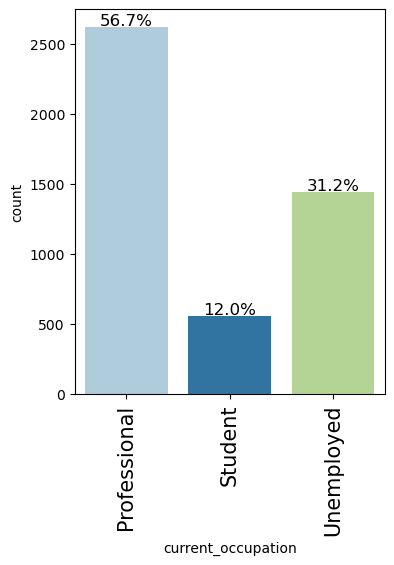

In [21]:
labeled_barplot(data, "current_occupation", perc=True)

### Observations on number of first_interaction

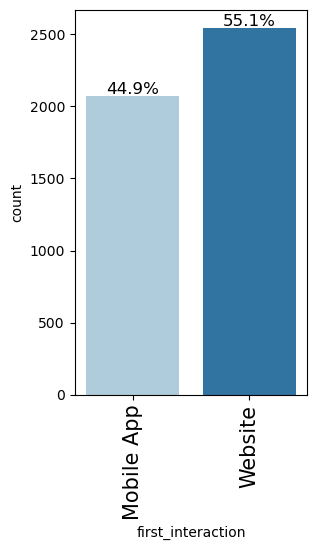

In [22]:
labeled_barplot(data, "first_interaction", perc=True ) # Complete the code to plot labeled_barplot for first_interaction

### Observations on profile_completed

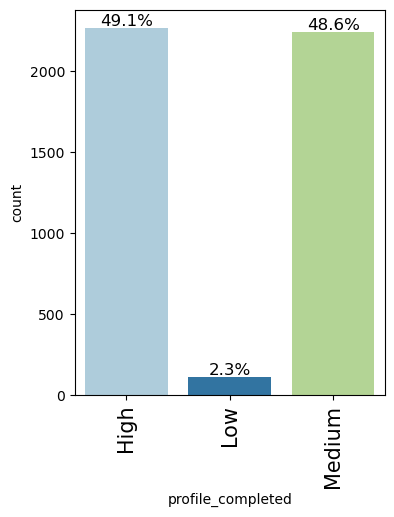

In [23]:
labeled_barplot(data, "profile_completed", perc=True) # Complete the code to plot labeled_barplot for profile_completed

### Observations on last_activity

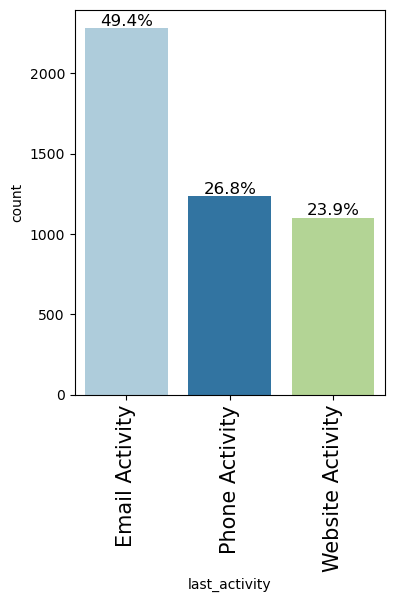

In [24]:
labeled_barplot(data, "last_activity", perc=True) # Complete the code to plot labeled_barplot for last_activity

### Observations on print_media_type1

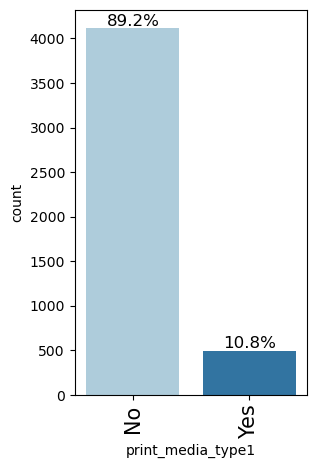

In [25]:
labeled_barplot(data, "print_media_type1", perc=True) # Complete the code to plot labeled_barplot for print_media_type1

### Observations on print_media_type2

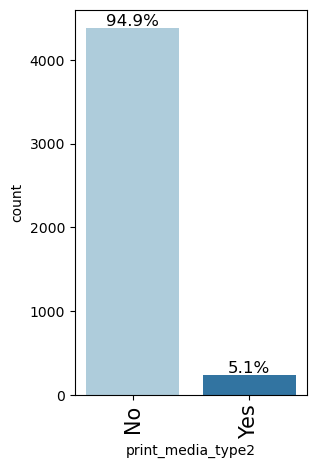

In [26]:
labeled_barplot(data, "print_media_type2", perc=True) # Complete the code to plot labeled_barplot for print_media_type2

### Observations on digital_media

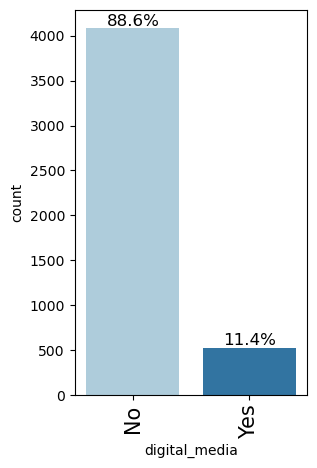

In [27]:
labeled_barplot(data, "digital_media", perc=True) # Complete the code to plot labeled_barplot for digital_media

### Observations on educational_channels

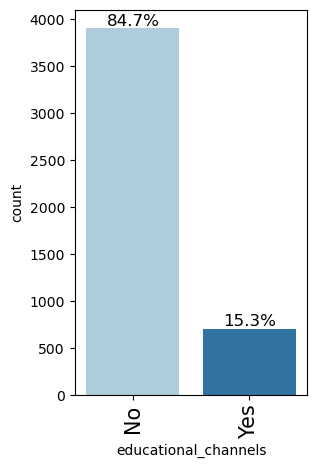

In [28]:
labeled_barplot(data, "educational_channels", perc=True) # Complete the code to plot labeled_barplot for educational_channels

### Observations on referral

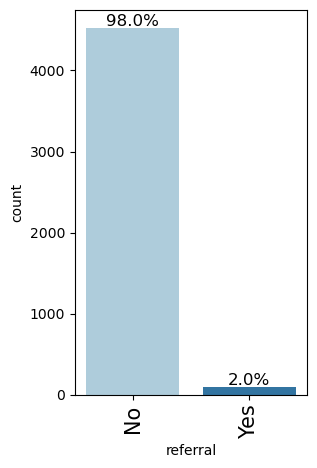

In [29]:
labeled_barplot(data, "referral", perc=True) # Complete the code to plot labeled_barplot for referral

### Observations on status

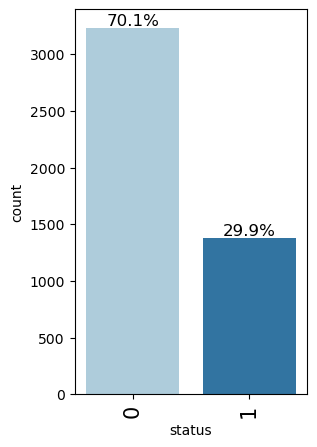

In [30]:
labeled_barplot(data, "status", perc=True) # Complete the code to plot labeled_barplot for status

### Bivariate Analysis

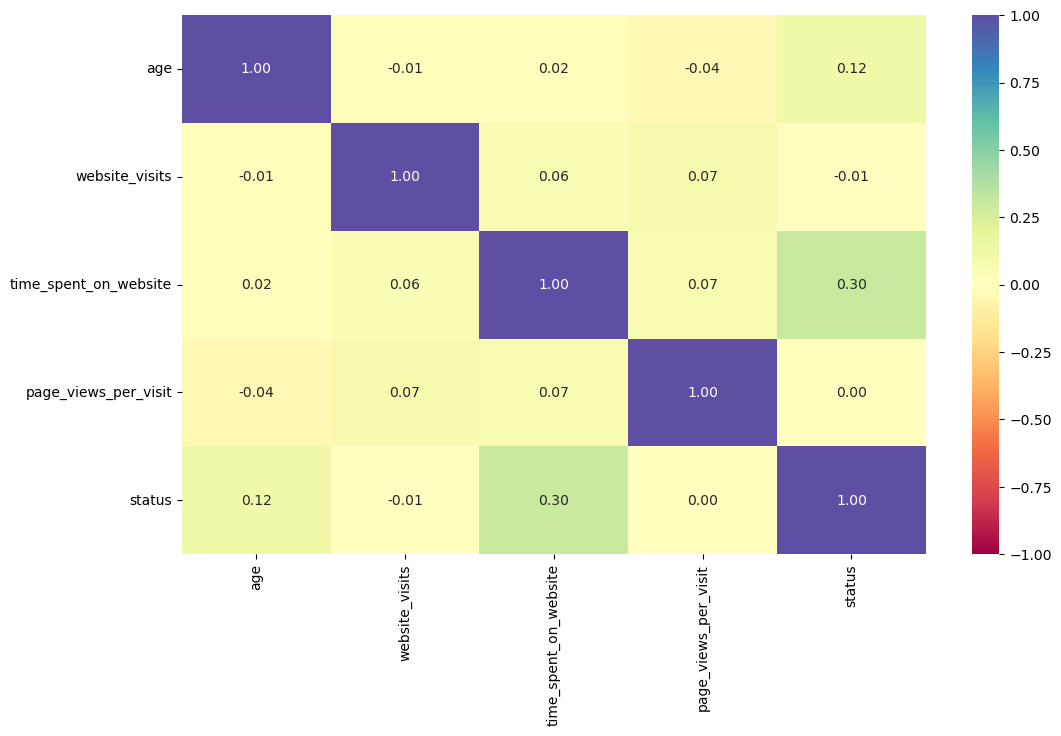

In [31]:
cols_list = data.select_dtypes(include=np.number).columns.tolist()

plt.figure(figsize=(12, 7))
sns.heatmap(
    data[cols_list].corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral"
)
plt.show()

**Creating functions that will help us with further analysis.**

In [32]:
### function to plot distributions wrt target


def distribution_plot_wrt_target(data, predictor, target):

    fig, axs = plt.subplots(2, 2, figsize=(12, 10))

    target_uniq = data[target].unique()

    axs[0, 0].set_title("Distribution of target for target=" + str(target_uniq[0]))
    sns.histplot(
        data=data[data[target] == target_uniq[0]],
        x=predictor,
        kde=True,
        ax=axs[0, 0],
        color="teal",
        stat="density",
    )

    axs[0, 1].set_title("Distribution of target for target=" + str(target_uniq[1]))
    sns.histplot(
        data=data[data[target] == target_uniq[1]],
        x=predictor,
        kde=True,
        ax=axs[0, 1],
        color="orange",
        stat="density",
    )

    axs[1, 0].set_title("Boxplot w.r.t target")
    sns.boxplot(data=data, x=target, y=predictor, ax=axs[1, 0], palette="gist_rainbow")

    axs[1, 1].set_title("Boxplot (without outliers) w.r.t target")
    sns.boxplot(
        data=data,
        x=target,
        y=predictor,
        ax=axs[1, 1],
        showfliers=False,
        palette="gist_rainbow",
    )

    plt.tight_layout()
    plt.show()

In [33]:
def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 5, 5))
    plt.legend(
        loc="lower left", frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

**Leads will have different expectations from the outcome of the course and the current occupation may play a key role for them to take the program. Let's analyze it**

status                 0     1   All
current_occupation                  
All                 3235  1377  4612
Professional        1687   929  2616
Unemployed          1058   383  1441
Student              490    65   555
------------------------------------------------------------------------------------------------------------------------


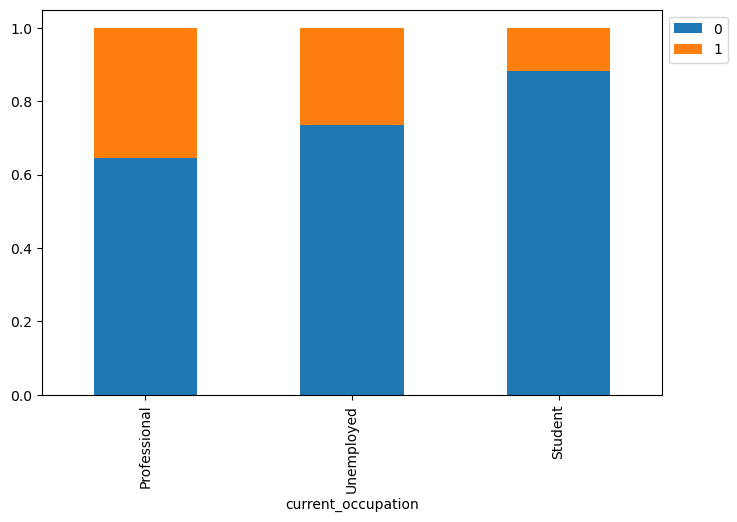

In [34]:
stacked_barplot(data, "current_occupation", "status")

**Age can be a good factor to differentiate between such leads**

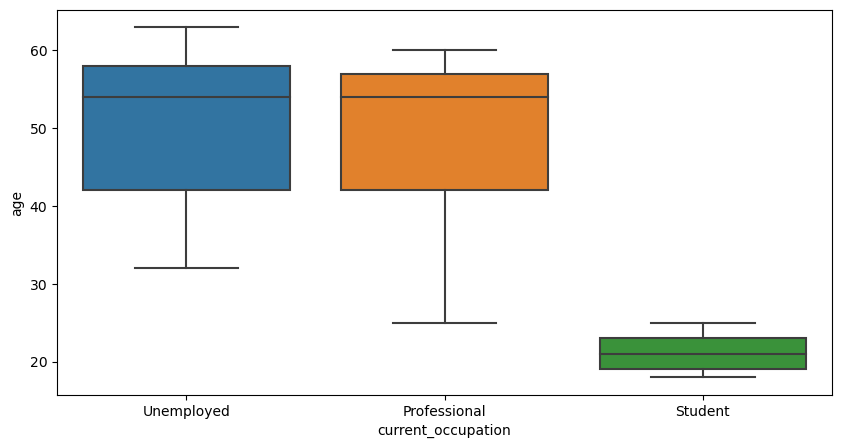

In [35]:
plt.figure(figsize=(10, 5))
sns.boxplot(x=data["current_occupation"], y=data["age"])
plt.show()

In [36]:
data.groupby(["current_occupation"])["age"].describe()

,count,mean,std,min,25%,50%,75%,max
current_occupation,,,,,,,,
Professional,2616.00000,49.34748,9.89074,25.00000,42.00000,54.00000,57.00000,60.00000
Student,555.00000,21.14414,2.00111,18.00000,19.00000,21.00000,23.00000,25.00000
Unemployed,1441.00000,50.14018,9.99950,32.00000,42.00000,54.00000,58.00000,63.00000


**The company's first interaction with leads should be compelling and persuasive. Let's see if the channels of the first interaction have an impact on the conversion of leads**

status                0     1   All
first_interaction                  
All                3235  1377  4612
Website            1383  1159  2542
Mobile App         1852   218  2070
------------------------------------------------------------------------------------------------------------------------


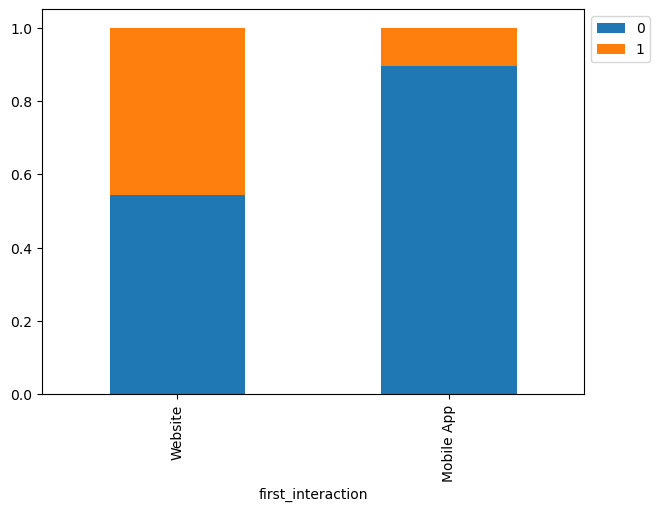

In [37]:
stacked_barplot(data, "first_interaction", "status") # Complete the code to plot stacked_barplot for first_interaction and status

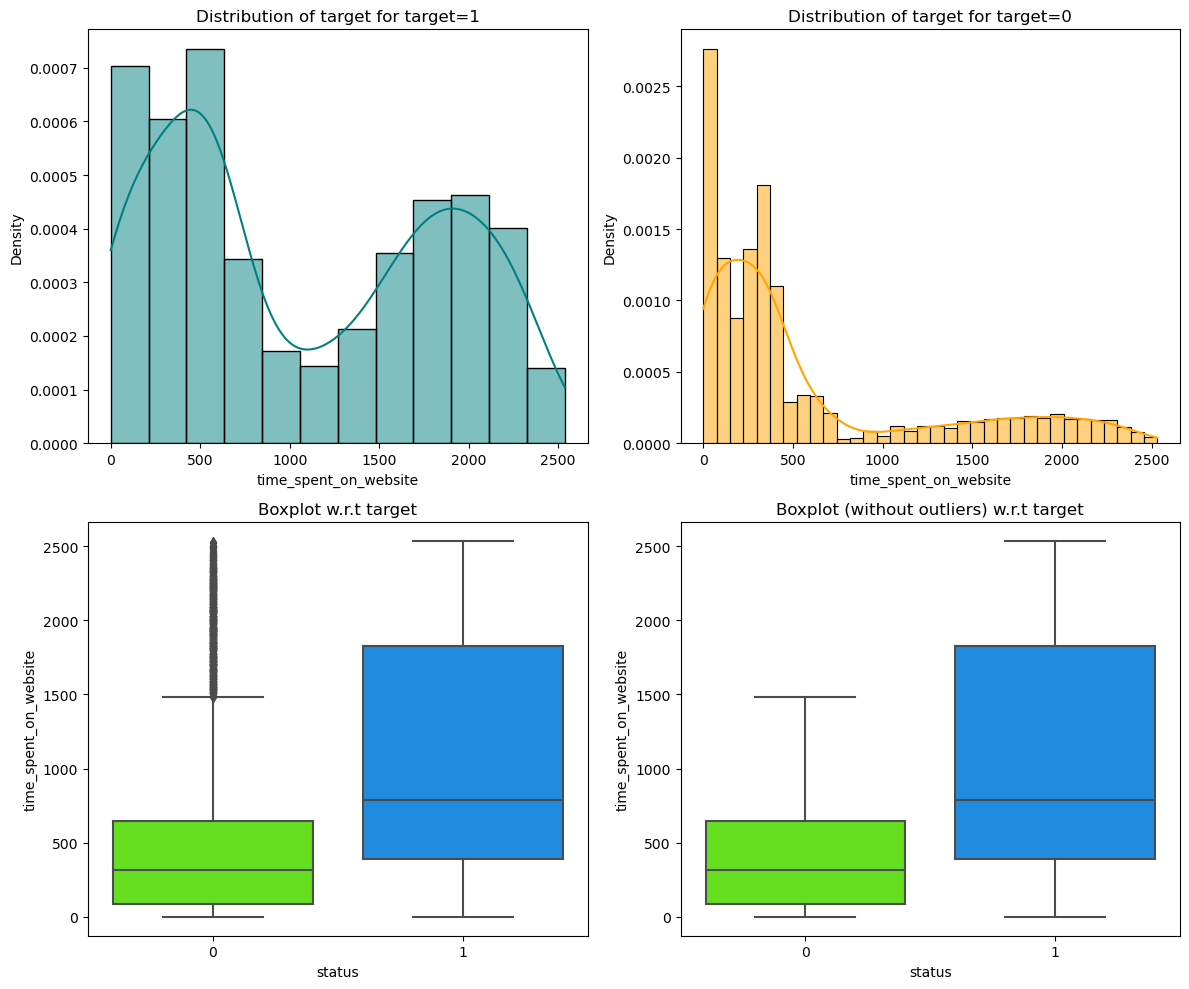

In [38]:
distribution_plot_wrt_target(data, "time_spent_on_website", "status")

In [39]:
# checking the median value
data.groupby(["status"])["time_spent_on_website"].median()

status
0   317.00000
1   789.00000
Name: time_spent_on_website, dtype: float64

**Let's do a similar analysis for time spent on website and page views per visit.**

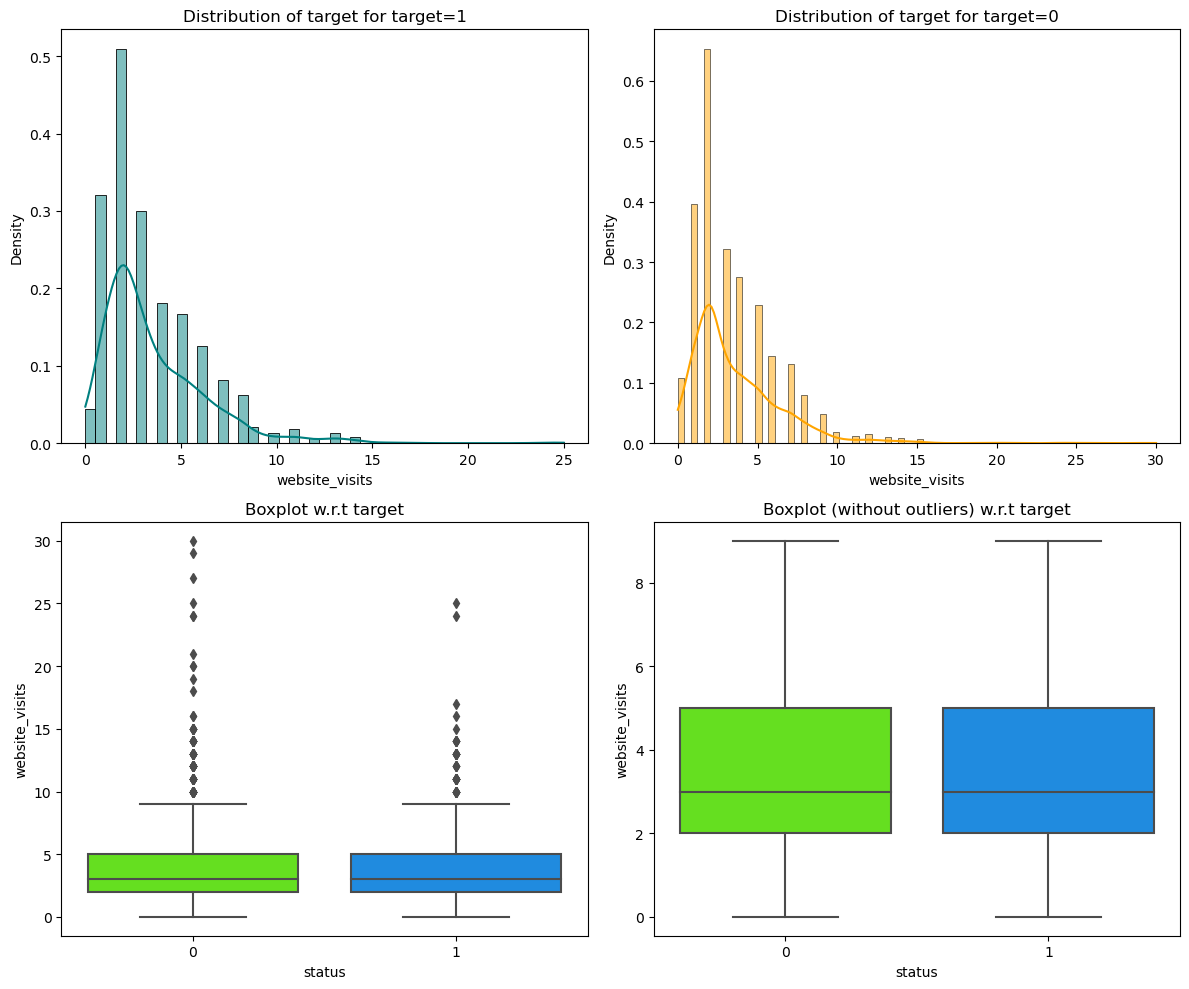

In [40]:
distribution_plot_wrt_target(data, "website_visits", "status") # Complete the code to plot distribution for website_visits and status

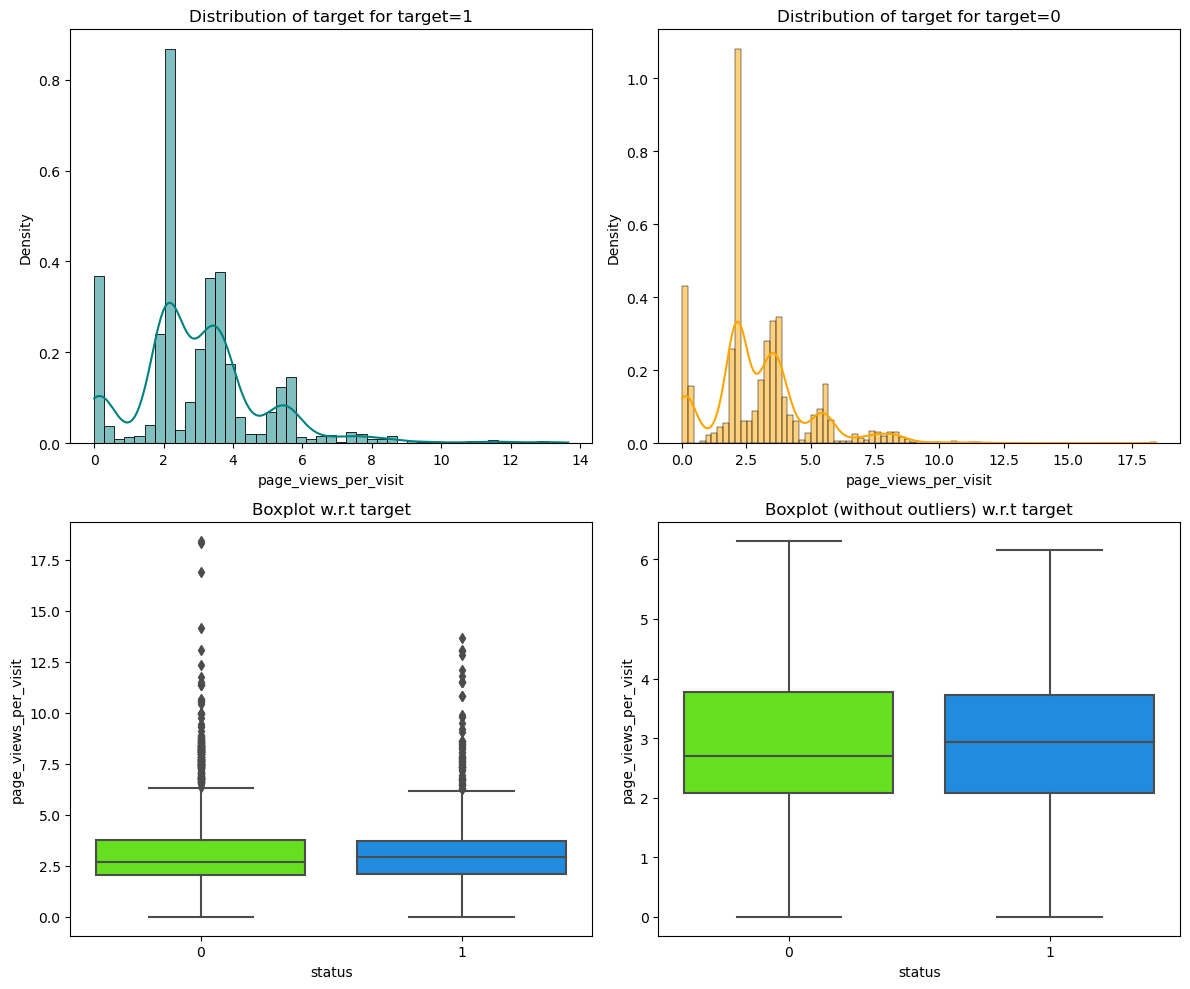

In [41]:
distribution_plot_wrt_target(data, "page_views_per_visit", "status") # Complete the code to plot distribution for page_views_per_visit and status

**People browsing the website or the mobile app are generally required to create a profile by sharing their personal details before they can access more information. Let's see if the profile completion level has an impact on lead status**

status                0     1   All
profile_completed                  
All                3235  1377  4612
High               1318   946  2264
Medium             1818   423  2241
Low                  99     8   107
------------------------------------------------------------------------------------------------------------------------


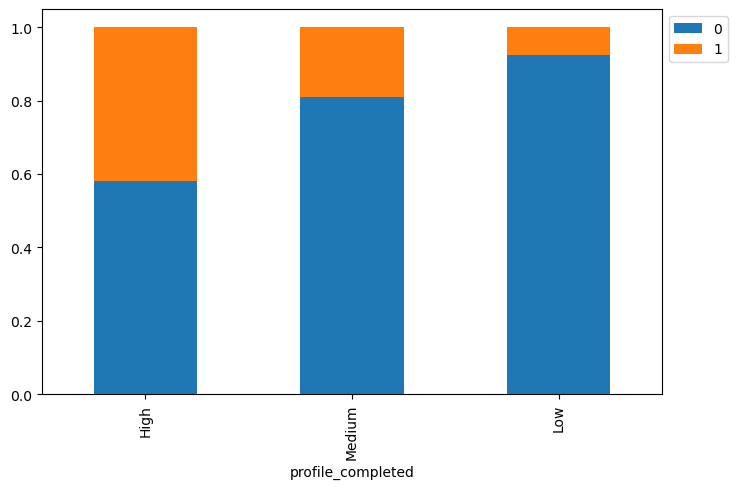

In [42]:
stacked_barplot(data, "profile_completed", "status")  # Complete the code to plot stacked_barplot for profile_completed and status

**After a lead shares their information by creating a profile, there may be interactions between the lead and the company to proceed with the process of enrollment. Let's see how the last activity impacts lead conversion status**

status               0     1   All
last_activity                     
All               3235  1377  4612
Email Activity    1587   691  2278
Website Activity   677   423  1100
Phone Activity     971   263  1234
------------------------------------------------------------------------------------------------------------------------


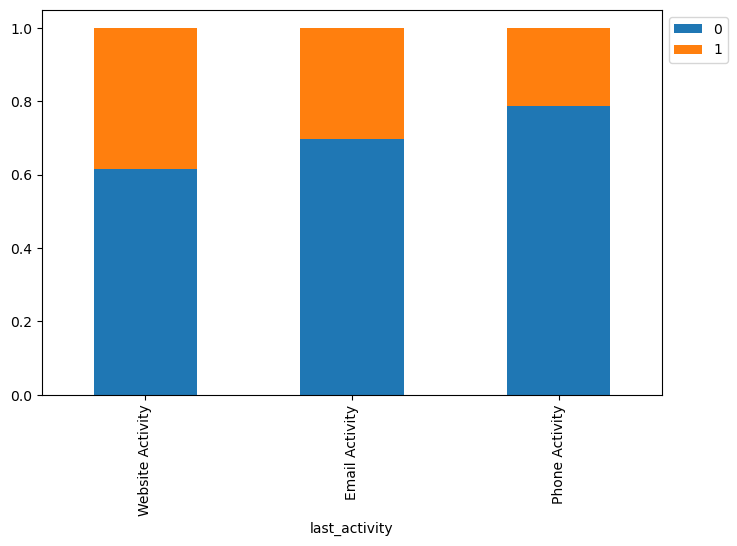

In [43]:
stacked_barplot(data, "last_activity", "status") # Complete the code to plot stacked_barplot for last_activity and status

**Let's see how advertisement and referrals impact the lead status**

status                0     1   All
print_media_type1                  
All                3235  1377  4612
No                 2897  1218  4115
Yes                 338   159   497
------------------------------------------------------------------------------------------------------------------------


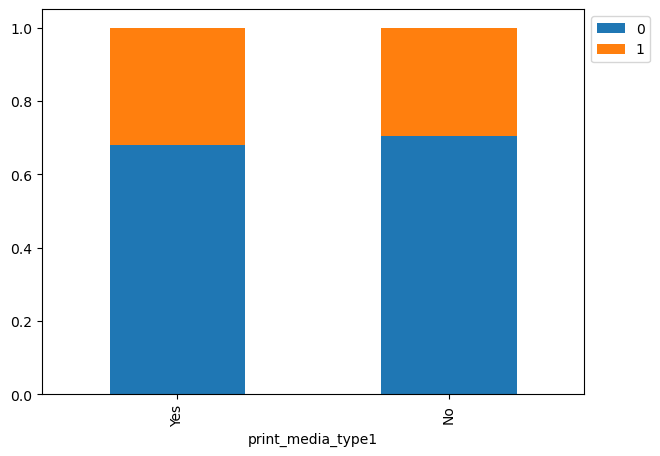

In [44]:
stacked_barplot(data, "print_media_type1", "status") # Complete the code to plot stacked_barplot for print_media_type1 and status

status                0     1   All
print_media_type2                  
All                3235  1377  4612
No                 3077  1302  4379
Yes                 158    75   233
------------------------------------------------------------------------------------------------------------------------


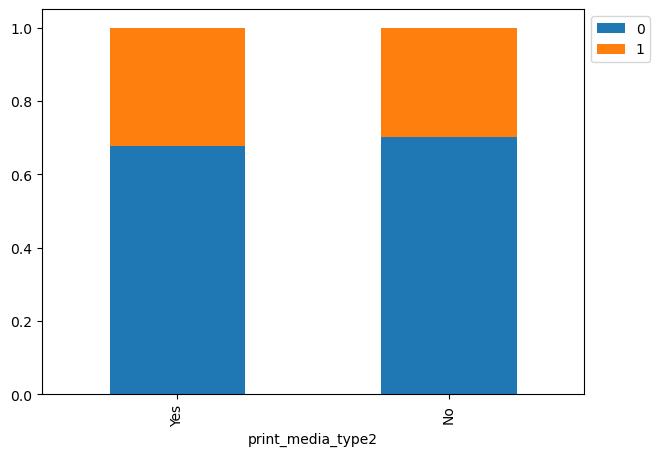

In [45]:
stacked_barplot(data, "print_media_type2", "status") # Complete the code to plot stacked_barplot for print_media_type2 and status

status            0     1   All
digital_media                  
All            3235  1377  4612
No             2876  1209  4085
Yes             359   168   527
------------------------------------------------------------------------------------------------------------------------


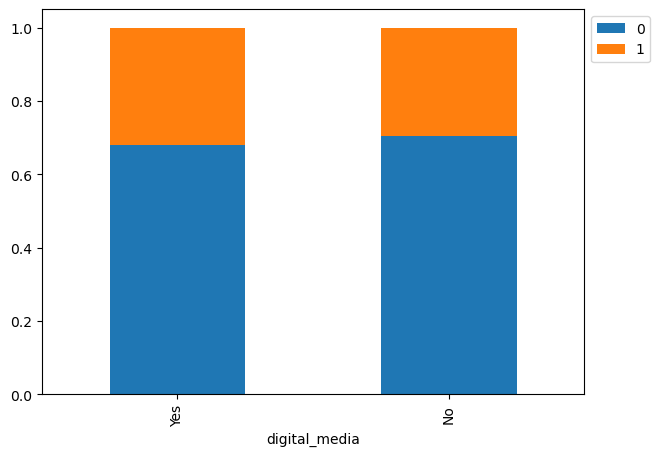

In [46]:
stacked_barplot(data, "digital_media", "status") # Complete the code to plot stacked_barplot for digital_media and status

status                   0     1   All
educational_channels                  
All                   3235  1377  4612
No                    2727  1180  3907
Yes                    508   197   705
------------------------------------------------------------------------------------------------------------------------


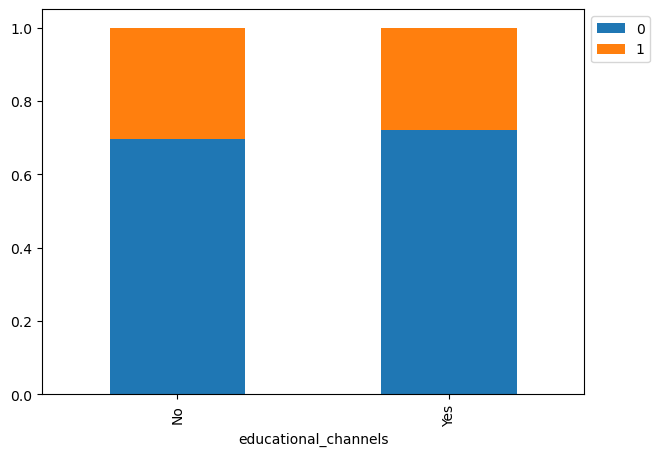

In [47]:
stacked_barplot(data, "educational_channels", "status") # Complete the code to plot stacked_barplot for educational_channels and status

status       0     1   All
referral                  
All       3235  1377  4612
No        3205  1314  4519
Yes         30    63    93
------------------------------------------------------------------------------------------------------------------------


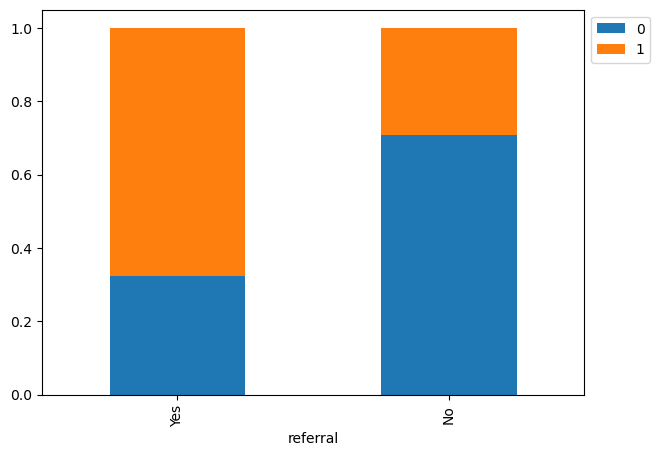

In [48]:
stacked_barplot(data, "referral", "status") # Complete the code to plot stacked_barplot for referral and status

### Outlier Check

- Let's check for outliers in the data.

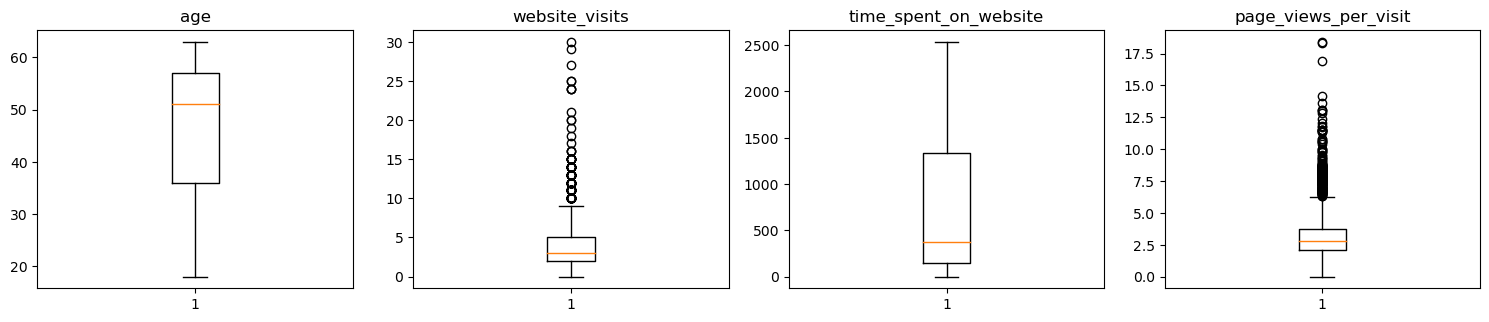

In [49]:
# outlier detection using boxplot
numeric_columns = data.select_dtypes(include=np.number).columns.tolist()
# dropping release_year as it is a temporal variable
numeric_columns.remove("status")

plt.figure(figsize=(15, 12))

for i, variable in enumerate(numeric_columns):
    plt.subplot(4, 4, i + 1)
    plt.boxplot(data[variable], whis=1.5)
    plt.tight_layout()
    plt.title(variable)

plt.show()

### Data Preparation for modeling

- We want to predict which lead is more likely to be converted.
- Before we proceed to build a model, we'll have to encode categorical features.
- We'll split the data into train and test to be able to evaluate the model that we build on the train data.

In [50]:
X = data.drop(["status"], axis=1)
Y = data['status'] # Complete the code to define the dependent (target) variable

X = pd.get_dummies(X, drop_first=True) # Complete the code to get dummies for X

# Splitting the data in 70:30 ratio for train to test data
X_train, X_test, y_train, y_test = train_test_split(
    X, Y, test_size=0.30, random_state=1
)

In [51]:
print("Shape of Training set : ", X_train.shape)
print("Shape of test set : ", X_test.shape)
print("Percentage of classes in training set:")
print(y_train.value_counts(normalize=True))
print("Percentage of classes in test set:")
print(y_test.value_counts(normalize=True))

Shape of Training set :  (3228, 16)
Shape of test set :  (1384, 16)
Percentage of classes in training set:
status
0   0.70415
1   0.29585
Name: proportion, dtype: float64
Percentage of classes in test set:
status
0   0.69509
1   0.30491
Name: proportion, dtype: float64


### Model evaluation criterion

### Model can make wrong predictions as:

1. Predicting a lead will not be converted to a paid customer in reality, the lead would have converted to a paid customer.
2. Predicting a lead will be converted to a paid customer in reality, the lead would not have converted to a paid customer.

### Which case is more important?

* If we predict that a lead will not get converted and the lead would have converted then the company will lose a potential customer.

* If we predict that a lead will get converted and the lead doesn't get converted the company might lose resources by nurturing false-positive cases.

Losing a potential customer is a greater loss.

### How to reduce the losses?

* Company would want `Recall` to be maximized, greater the Recall score higher are the chances of minimizing False Negatives.

#### First, let's create functions to calculate different metrics and confusion matrix so that we don't have to use the same code repeatedly for each model.
* The model_performance_classification_statsmodels function will be used to check the model performance of models.
* The confusion_matrix_statsmodels function will be used to plot the confusion matrix.

In [52]:
# defining a function to compute different metrics to check performance of a classification model built using statsmodels
def model_performance_classification_statsmodels(
    model, predictors, target, threshold=0.5
):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    threshold: threshold for classifying the observation as class 1
    """

    # checking which probabilities are greater than threshold
    pred_temp = model.predict(predictors) > threshold
    # rounding off the above values to get classes
    pred = np.round(pred_temp)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {"Accuracy": acc, "Recall": recall, "Precision": precision, "F1": f1,},
        index=[0],
    )

    return df_perf

In [53]:
# defining a function to plot the confusion_matrix of a classification model


def confusion_matrix_statsmodels(model, predictors, target, threshold=0.5):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    threshold: threshold for classifying the observation as class 1
    """
    y_pred = model.predict(predictors) > threshold
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

### Splitting the Data

In [54]:
X = data.drop(["status"], axis=1)
Y = data["status"]

X = pd.get_dummies(X) ## Complete the code to create dummies for X

# Splitting data in train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=1) ## Complete the code to split the data into train test in the ratio 70:30 with random_state = 1

## Building Model

#### First, let's create functions to calculate different metrics and confusion matrix so that we don't have to use the same code repeatedly for each model.
* The model_performance_classification_sklearn function will be used to check the model performance of models.
* The confusion_matrix_sklearn function will be used to plot the confusion matrix.

In [55]:
# defining a function to compute different metrics to check performance of a classification model built using sklearn
def model_performance_classification_sklearn(model, predictors, target):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {"Accuracy": acc, "Recall": recall, "Precision": precision, "F1": f1,},
        index=[0],
    )

    return df_perf

In [56]:
def confusion_matrix_sklearn(model, predictors, target):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    """
    y_pred = model.predict(predictors)
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

### Building Logistic Regression Model

In [57]:
model = LogisticRegression(random_state=1)
model.fit(X_train, y_train) ## Complete the code to fit logistic regression on train data

LogisticRegression(random_state=1)

#### Checking model performance on training set

In [58]:
logistic_reg_perf_train = model_performance_classification_sklearn(
    model, X_train, y_train
)
logistic_reg_perf_train

,Accuracy,Recall,Precision,F1
0,0.82125,0.63770,0.72500,0.67855


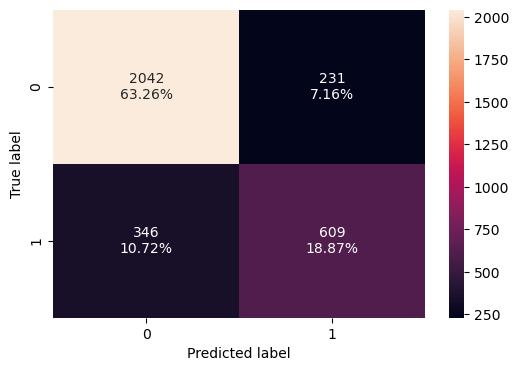

In [59]:
confusion_matrix_sklearn(model, X_train, y_train) ## Complete the code to create confusion matrix for train data

#### Checking model performance on test set

In [60]:
logistic_reg_perf_test = model_performance_classification_sklearn(# Complete the code to check performance on test set
        model, X_test, y_test
)    
logistic_reg_perf_test

,Accuracy,Recall,Precision,F1
0,0.80925,0.61848,0.71703,0.66412


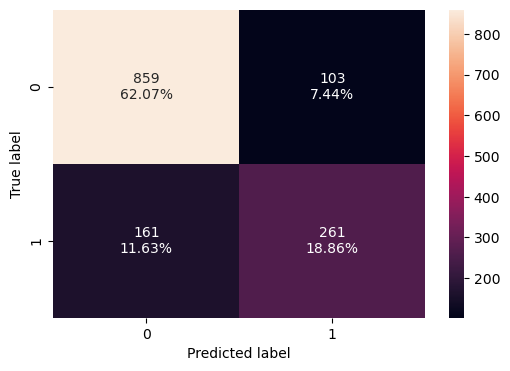

In [61]:
confusion_matrix_sklearn(model, X_test, y_test) ## Complete the code to create confusion matrix for test data

#### ROC-AUC


Train ROC-AUC score is : 0.8762545981393228

Test ROC-AUC score is : 0.860983978874974


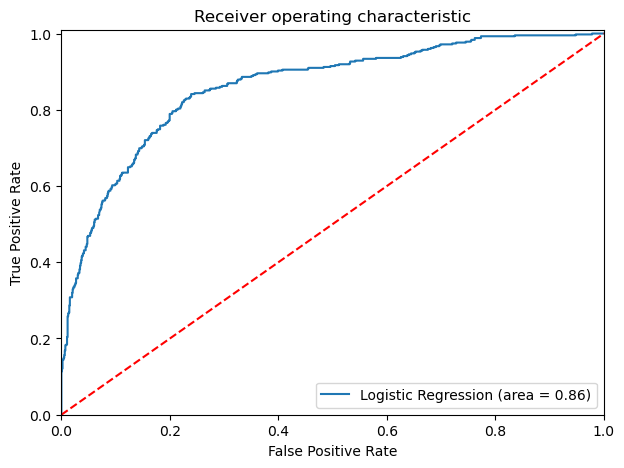

In [62]:
print("\nTrain ROC-AUC score is : {}".format(roc_auc_score(y_train,model.predict_proba(X_train)[:,1])))

print("\nTest ROC-AUC score is : {}".format(roc_auc_score(y_test,model.predict_proba(X_test)[:,1])))
logit_roc_auc_test = roc_auc_score(y_test, model.predict_proba(X_test)[:,1])
fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(X_test)[:,1])
plt.figure(figsize=(7, 5))
plt.plot(fpr, tpr, label="Logistic Regression (area = %0.2f)" % logit_roc_auc_test)
plt.plot([0, 1], [0, 1], "r--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.01])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operating characteristic")
plt.legend(loc="lower right")
plt.show()

### Using GridSearch for Hyperparameter tuning of our logistic regression model
* Let's see if we can improve our model performance even more.

In [63]:
# Choose the type of classifier.
estimator = LogisticRegression(random_state=1)

# Grid of parameters to choose from

parameters = {
    "penalty": ['l1', 'l2', 'elasticnet'],
    "solver": ['lbfgs', 'liblinear', 'newton-cg', 'saga'],
    "tol": [0.0001, 0.0002, 0.0003]
}

# Type of scoring used to compare parameter combinations
acc_scorer = make_scorer(recall_score)

# Run the grid search
grid_obj = GridSearchCV(estimator, parameters, scoring=acc_scorer, cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
estimator = grid_obj.best_estimator_

# Complete the code to fit the best algorithm to the data.
estimator.fit(X_train, y_train)

LogisticRegression(random_state=1, solver='liblinear', tol=0.0003)

#### Checking performance on training set

In [64]:
logistic_reg_tune_perf_train = model_performance_classification_sklearn(model, X_train, y_train) #Complete the code to check performance of train data
logistic_reg_tune_perf_train

,Accuracy,Recall,Precision,F1
0,0.82125,0.63770,0.72500,0.67855


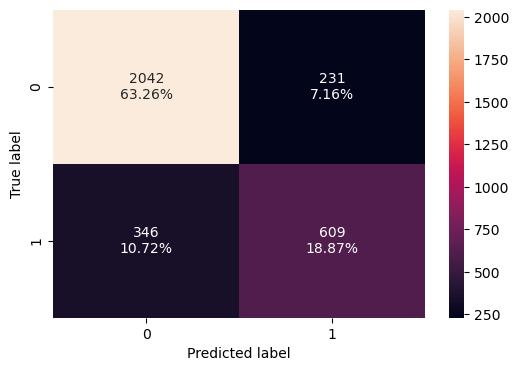

In [65]:
confusion_matrix_sklearn(model, X_train, y_train) # Complete the code to create confusion matrix for train data

#### Checking model performance on test set

In [66]:
logistic_reg_tune_perf_test = model_performance_classification_sklearn(model, X_test, y_test) #Complete the code to check performance of train data

logistic_reg_tune_perf_test

,Accuracy,Recall,Precision,F1
0,0.80925,0.61848,0.71703,0.66412


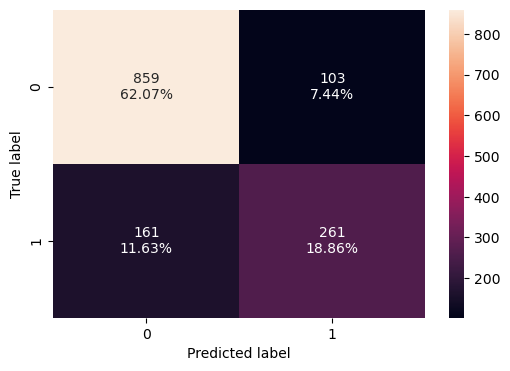

In [67]:
confusion_matrix_sklearn(model, X_test, y_test) #Complete the code to create confusion matrix for train data

#### Feature Importance

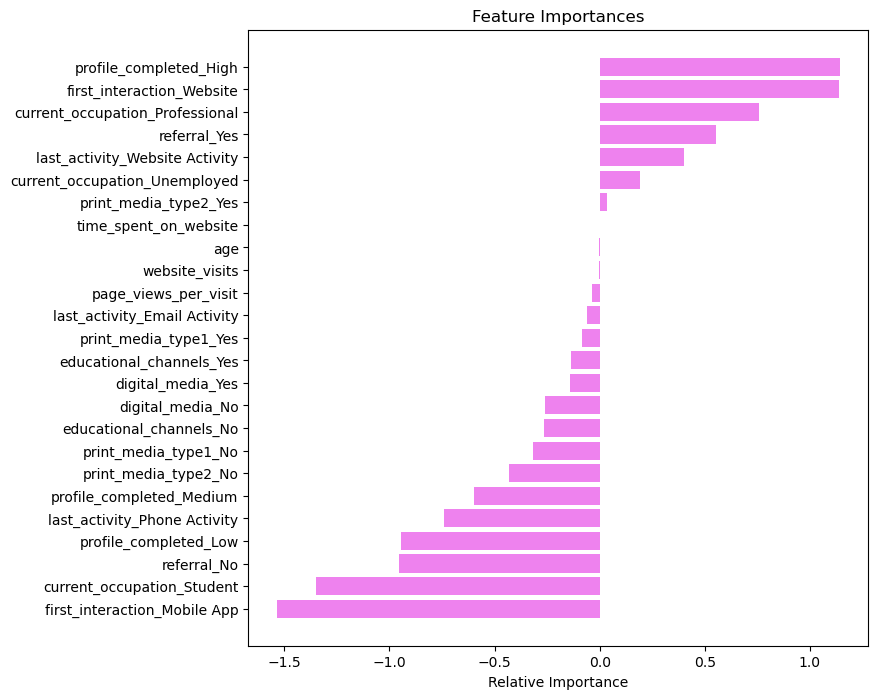

In [68]:
feature_names = list(X_train.columns)
importances = estimator.coef_[0]
indices = np.argsort(importances)

plt.figure(figsize=(8, 8))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

### Building Linear Discriminant Analysis Model

In [69]:
model = LinearDiscriminantAnalysis()
model.fit(X_train, y_train) ## Complete the code to fit LDA on train data

LinearDiscriminantAnalysis()

#### Checking model performance on training set

In [70]:
lda_perf_train = model_performance_classification_sklearn(model, X_train, y_train) # Complete the code to check performance on train set
lda_perf_train

,Accuracy,Recall,Precision,F1
0,0.82404,0.65969,0.72165,0.68928


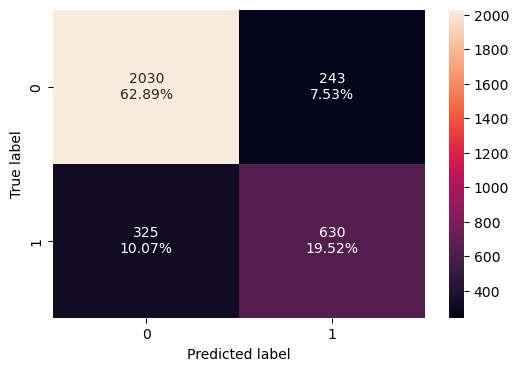

In [71]:
confusion_matrix_sklearn(model, X_train, y_train) ## Complete the code to create confusion matrix for train data

#### Checking model performance on test set

In [72]:
lda_perf_test = model_performance_classification_sklearn(model, X_test, y_test) # Complete the code to check performance on test set
lda_perf_test

,Accuracy,Recall,Precision,F1
0,0.81069,0.62322,0.71858,0.66751


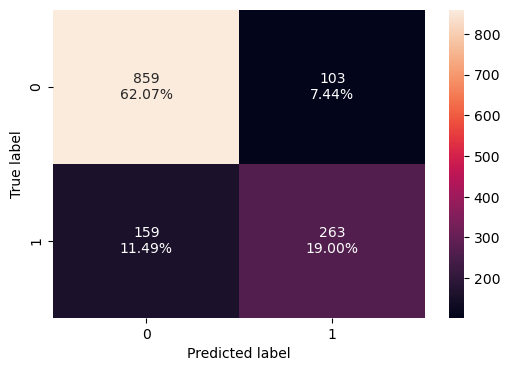

In [73]:
confusion_matrix_sklearn(model, X_test, y_test) ## Complete the code to create confusion matrix for test data

#### ROC-AUC


Train ROC-AUC score is : 0.877286516193973

Test ROC-AUC score is : 0.8609544196037087


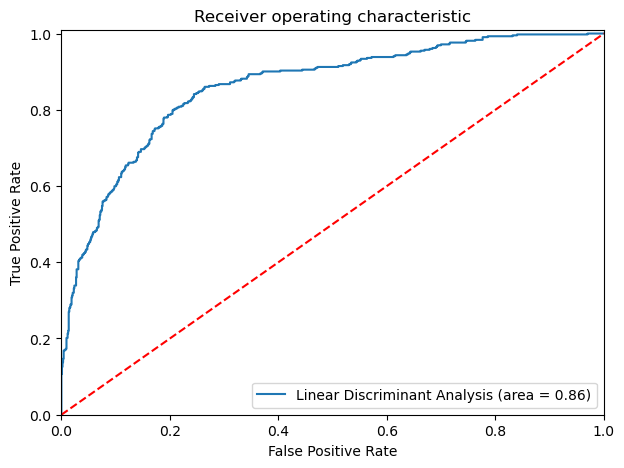

In [74]:
print("\nTrain ROC-AUC score is : {}".format(roc_auc_score(y_train,model.predict_proba(X_train)[:,1])))

print("\nTest ROC-AUC score is : {}".format(roc_auc_score(y_test,model.predict_proba(X_test)[:,1]))) # Complete the code to find the ROC-AUC score for test set
lda_roc_auc_test = roc_auc_score(y_test, model.predict_proba(X_test)[:,1])  # Complete the code to store the ROC-AUC score in the variable
fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(X_test)[:,1])  # Complete the code to set the fpr, tpr and thresholds
plt.figure(figsize=(7, 5))
plt.plot(fpr, tpr, label="Linear Discriminant Analysis (area = %0.2f)" % lda_roc_auc_test)
plt.plot([0, 1], [0, 1], "r--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.01])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operating characteristic")
plt.legend(loc="lower right")
plt.show()

### Using GridSearch for Hyperparameter tuning of our LDA model
* Let's see if we can improve our model performance even more.

In [75]:
# Choose the type of classifier.
estimator = LinearDiscriminantAnalysis()

# Grid of parameters to choose from

parameters = {
    "solver": ['svd', 'lsqr', 'eigen'],
    "shrinkage": np.arange(0, 1, 0.01)
}

# Type of scoring used to compare parameter combinations
acc_scorer = make_scorer(recall_score)

# Run the grid search
grid_obj = GridSearchCV(estimator, parameters, scoring=acc_scorer, cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
estimator = grid_obj.best_estimator_

# Complete the code to fit the best algorithm to the data.
estimator.fit(X_train, y_train)

LinearDiscriminantAnalysis(shrinkage=0.0, solver='lsqr')

#### Checking model performance on training set

In [76]:
lda_tune_perf_train = model_performance_classification_sklearn(model, X_train, y_train) # Complete the code to check performance on train set
lda_tune_perf_train

,Accuracy,Recall,Precision,F1
0,0.82404,0.65969,0.72165,0.68928


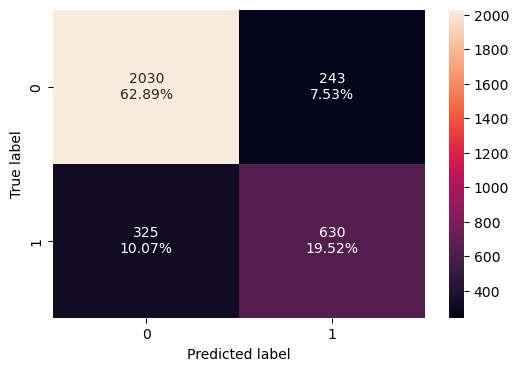

In [77]:
confusion_matrix_sklearn(model, X_train, y_train) ## Complete the code to create confusion matrix for train data

#### Checking model performance on test set

In [78]:
lda_tune_perf_test = model_performance_classification_sklearn(model, X_test, y_test) #Complete the code to check performance on test set
lda_tune_perf_test

,Accuracy,Recall,Precision,F1
0,0.81069,0.62322,0.71858,0.66751


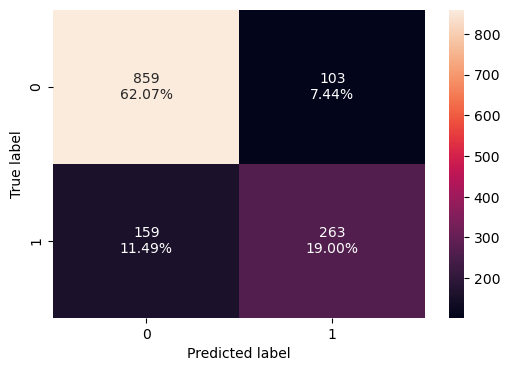

In [79]:
confusion_matrix_sklearn(model, X_test, y_test) ## Complete the code to create confusion matrix for test data

#### Feature Importance

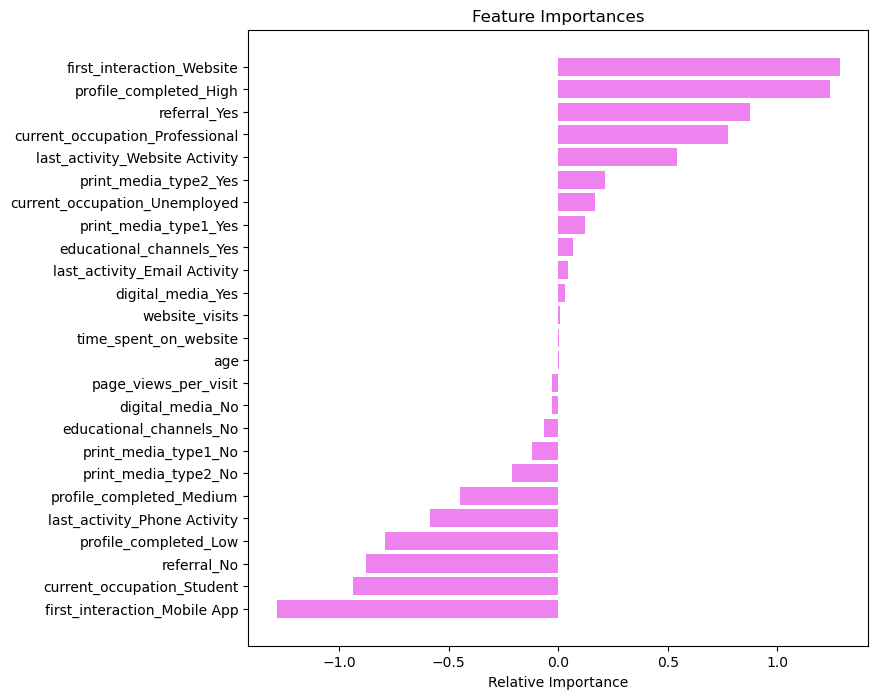

In [80]:
feature_names = list(X_train.columns) #Complete the code to find the column names
importances = estimator.coef_[0] # Complete the code to find the coefficients of the model
indices = np.argsort(importances)  # Complete the code to find the indices

plt.figure(figsize=(8, 8))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

### Building Decision Tree Model

In [81]:
model = DecisionTreeClassifier(random_state=1)
model.fit(X_train, y_train) ## Complete the code to fit decision tree on train data

DecisionTreeClassifier(random_state=1)

#### Checking model performance on training set

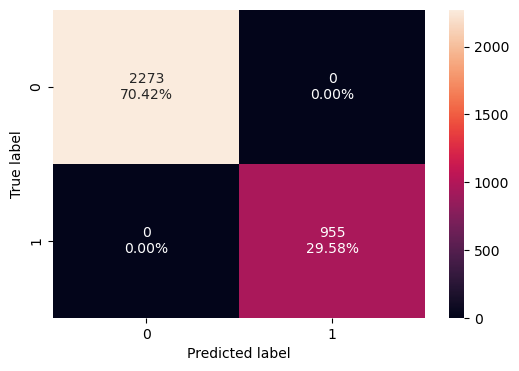

In [82]:
confusion_matrix_sklearn(model, X_train, y_train) ## Complete the code to create confusion matrix for train data

In [83]:
decision_tree_perf_train = model_performance_classification_sklearn(model, X_train, y_train)
decision_tree_perf_train

,Accuracy,Recall,Precision,F1
0,1.00000,1.00000,1.00000,1.00000


#### Checking model performance on test set

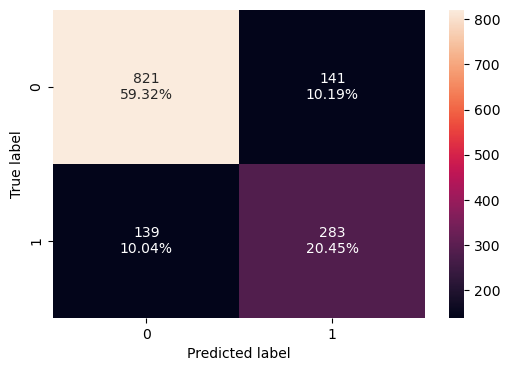

In [84]:
confusion_matrix_sklearn(model, X_test, y_test) ## Complete the code to create confusion matrix for test data

In [85]:
decision_tree_perf_test = model_performance_classification_sklearn(model, X_test, y_test) ## Complete the code to check performance on test set
decision_tree_perf_test

,Accuracy,Recall,Precision,F1
0,0.79769,0.67062,0.66745,0.66903



Train ROC-AUC score is : 1.0

Test ROC-AUC score is : 0.7620232335872146


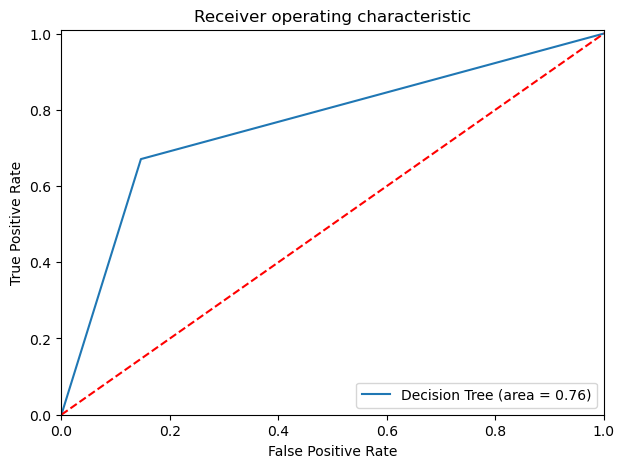

In [86]:
print("\nTrain ROC-AUC score is : {}".format(roc_auc_score(y_train,model.predict_proba(X_train)[:,1]))) # Complete the code to find the ROC-AUC score for train set

print("\nTest ROC-AUC score is : {}".format(roc_auc_score(y_test,model.predict_proba(X_test)[:,1]))) # Complete the code to find the ROC-AUC score for test set
dt_roc_auc_test = roc_auc_score(y_test, model.predict_proba(X_test)[:,1])  # Complete the code to store the ROC-AUC score in the variable
fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(X_test)[:,1])  # Complete the code to set the fpr, tpr and thresholds
plt.figure(figsize=(7, 5))
plt.plot(fpr, tpr, label="Decision Tree (area = %0.2f)" % dt_roc_auc_test)
plt.plot([0, 1], [0, 1], "r--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.01])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operating characteristic")
plt.legend(loc="lower right")
plt.show()

### Using GridSearch for Hyperparameter tuning of our Decision Tree model
* Let's see if we can improve our model performance even more.

In [87]:
# Choose the type of classifier.
estimator = DecisionTreeClassifier(random_state=1, class_weight={0: 0.3, 1: 0.7})

# Grid of parameters to choose from
parameters = {
    "max_depth": np.arange(5, 13, 2),
    "max_leaf_nodes": [10, 20, 40, 50, 75, 100],
    "min_samples_split": [2, 5, 7, 10, 20, 30],
}

# Type of scoring used to compare parameter combinations
acc_scorer = make_scorer(recall_score)

# Run the grid search
grid_obj = GridSearchCV(estimator, parameters, scoring=acc_scorer, cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
estimator = grid_obj.best_estimator_

# Complete the code to fit the best algorithm to the data.
estimator.fit(X_train, y_train)

DecisionTreeClassifier(class_weight={0: 0.3, 1: 0.7}, max_depth=5,
                       max_leaf_nodes=20, random_state=1)

#### Checking performance on training set

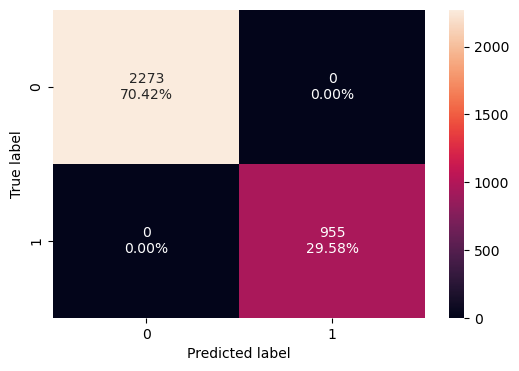

In [88]:
confusion_matrix_sklearn(model, X_train, y_train) ## Complete the code to create confusion matrix for train data

In [89]:
decision_tree_tune_perf_train = model_performance_classification_sklearn(model, X_train, y_train) ## Complete the code to check performance on train set
decision_tree_tune_perf_train

,Accuracy,Recall,Precision,F1
0,1.00000,1.00000,1.00000,1.00000


#### Checking performance on test set

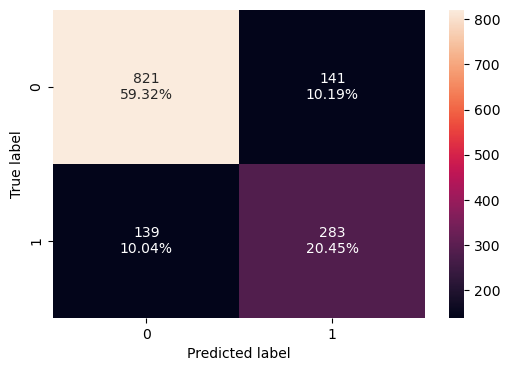

In [90]:
confusion_matrix_sklearn(model, X_test, y_test) ## Complete the code to create confusion matrix for test data

In [91]:
decision_tree_tune_perf_test = model_performance_classification_sklearn(model, X_test, y_test) ## Complete the code to check performance on test set
decision_tree_tune_perf_test

,Accuracy,Recall,Precision,F1
0,0.79769,0.67062,0.66745,0.66903


### Visualizing the Decision Tree

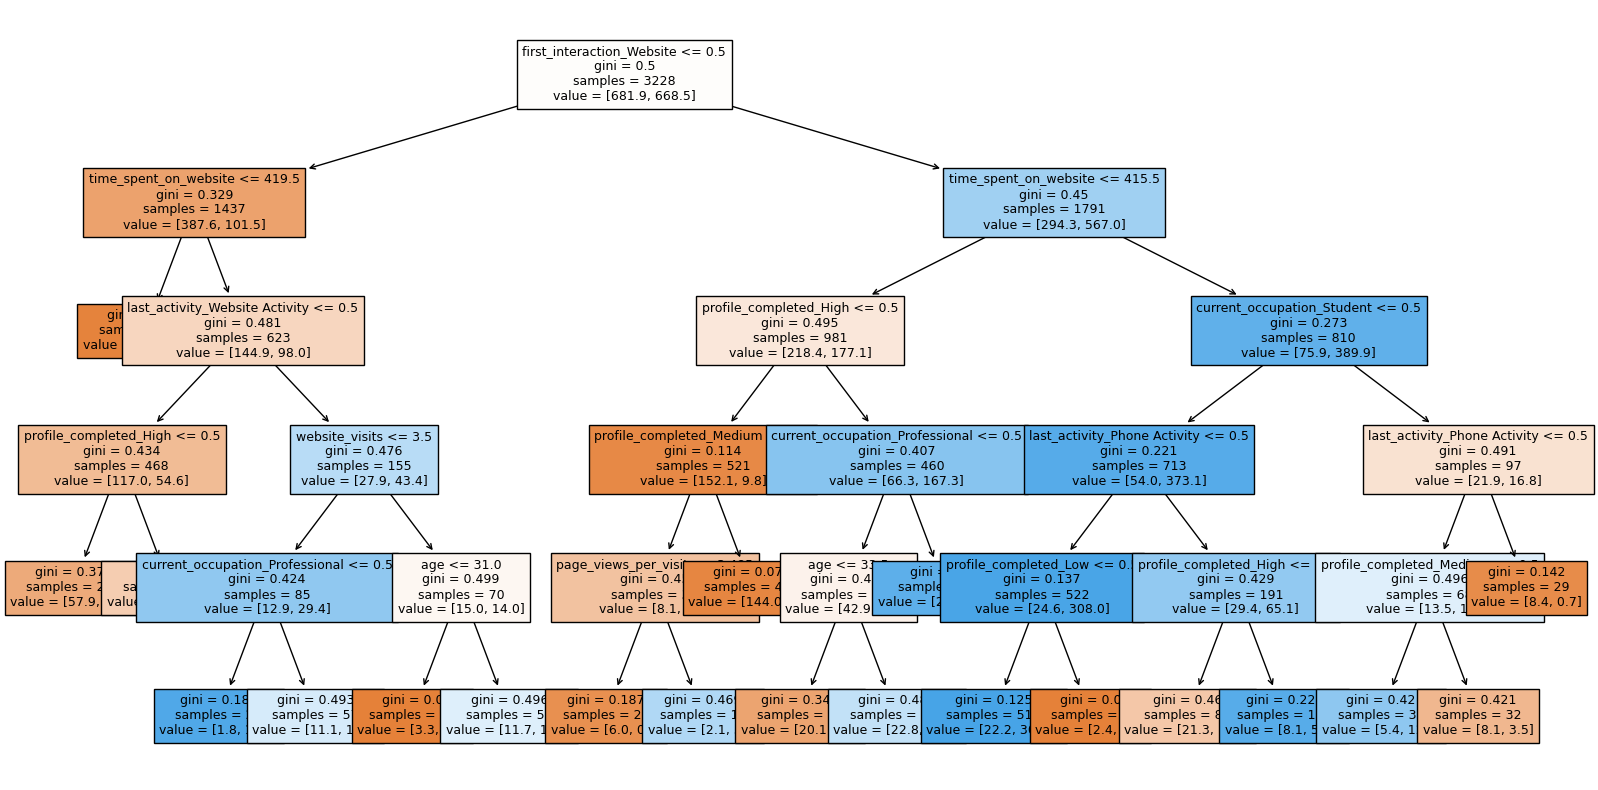

In [92]:
plt.figure(figsize=(20, 10))
out = tree.plot_tree(
    estimator,
    feature_names=feature_names,
    filled=True,
    fontsize=9,
    node_ids=False,
    class_names=None,
)
# below code will add arrows to the decision tree split if they are missing
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor("black")
        arrow.set_linewidth(1)
plt.show()

In [93]:
# Text report showing the rules of a decision tree -
print(tree.export_text(estimator, feature_names=feature_names, show_weights=True))

|--- first_interaction_Website <= 0.50
|   |--- time_spent_on_website <= 419.50
|   |   |--- weights: [242.70, 3.50] class: 0
|   |--- time_spent_on_website >  419.50
|   |   |--- last_activity_Website Activity <= 0.50
|   |   |   |--- profile_completed_High <= 0.50
|   |   |   |   |--- weights: [57.90, 18.90] class: 0
|   |   |   |--- profile_completed_High >  0.50
|   |   |   |   |--- weights: [59.10, 35.70] class: 0
|   |   |--- last_activity_Website Activity >  0.50
|   |   |   |--- website_visits <= 3.50
|   |   |   |   |--- current_occupation_Professional <= 0.50
|   |   |   |   |   |--- weights: [1.80, 15.40] class: 1
|   |   |   |   |--- current_occupation_Professional >  0.50
|   |   |   |   |   |--- weights: [11.10, 14.00] class: 1
|   |   |   |--- website_visits >  3.50
|   |   |   |   |--- age <= 31.00
|   |   |   |   |   |--- weights: [3.30, 0.00] class: 0
|   |   |   |   |--- age >  31.00
|   |   |   |   |   |--- weights: [11.70, 14.00] class: 1
|--- first_interaction_Web

#### Feature Importance

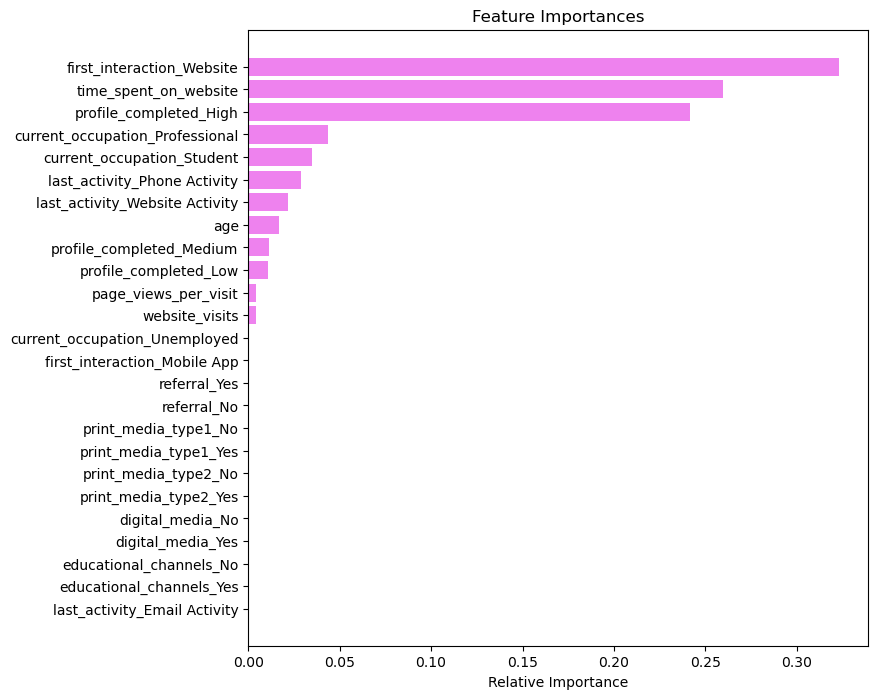

In [94]:
# importance of features in the tree building
feature_names = list(X_train.columns) #Complete the code to find the column names
importances = estimator.feature_importances_# Complete the code to find the coefficients of the model
indices = np.argsort(importances)  # Complete the code to find the indices

plt.figure(figsize=(8, 8))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

### Comparing all the  models

In [98]:
# training performance comparison

models_train_comp_df = pd.concat(
    [
        logistic_reg_perf_train.T,
        logistic_reg_tune_perf_train.T,
        lda_perf_train.T,
        lda_tune_perf_train.T,
        decision_tree_perf_train.T,
        decision_tree_tune_perf_train.T,
    ],
    axis=1,
)
models_train_comp_df.columns = [
    "Logistic Regression",
    "Logistic Regression After Tuning",
    "LDA",
    "LDA After Tuning",
    "Decision Tree",
    "Decision Tree After Tuning"
]
print("Training performance comparison:")
print(models_train_comp_df)

Training performance comparison:
           Logistic Regression  Logistic Regression After Tuning     LDA  \
Accuracy               0.82125                           0.82125 0.82404   
Recall                 0.63770                           0.63770 0.65969   
Precision              0.72500                           0.72500 0.72165   
F1                     0.67855                           0.67855 0.68928   

           LDA After Tuning  Decision Tree  Decision Tree After Tuning  
Accuracy            0.82404        1.00000                     1.00000  
Recall              0.65969        1.00000                     1.00000  
Precision           0.72165        1.00000                     1.00000  
F1                  0.68928        1.00000                     1.00000  


In [100]:
# testing performance comparison

models_test_comp_df = pd.concat(
    [
        logistic_reg_perf_test.T,
        logistic_reg_tune_perf_test.T,
        lda_perf_test.T,
        lda_tune_perf_test.T,
        decision_tree_perf_test.T,
        decision_tree_tune_perf_test.T,
    ],
    axis=1,
)
models_test_comp_df.columns = [
    "Logistic Regression",
    "Logistic Regression After Tuning",
    "LDA",
    "LDA After Tuning",
    "Decision Tree",
    "Decision Tree After Tuning"
]
print("Training performance comparison:")
print(models_train_comp_df) ## Complete the code to compare performance of test set

Training performance comparison:
           Logistic Regression  Logistic Regression After Tuning     LDA  \
Accuracy               0.80925                           0.80925 0.81069   
Recall                 0.61848                           0.61848 0.62322   
Precision              0.71703                           0.71703 0.71858   
F1                     0.66412                           0.66412 0.66751   

           LDA After Tuning  Decision Tree  Decision Tree After Tuning  
Accuracy            0.81069        0.79769                     0.79769  
Recall              0.62322        0.67062                     0.67062  
Precision           0.71858        0.66745                     0.66745  
F1                  0.66751        0.66903                     0.66903  


### Business Recommendations